In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
import seaborn as sn

py.init_notebook_mode(connected=True)

### Split into Test and Train (30/70)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020)

In [60]:
X_train.shape

(294, 10)

In [61]:
X_test.shape

(126, 10)

In [62]:
y_train.shape

(294, 5)

In [63]:
y_test.shape

(126, 5)

In [ ]:
#X_train.to_csv("2_Output/2_test_train_encoded/X_Train.csv")

In [ ]:
#X_test.to_csv("2_Output/2_test_train_encoded/X_Test.csv")

In [ ]:
#y_train.to_csv("2_Output/2_test_train_encoded/y_Train.csv")

In [ ]:
#y_test.to_csv("2_Output/2_test_train_encoded/y_Test.csv")

### Load Test and Train sets

In [2]:
X_train = pd.read_csv("2_Output/2_test_train_encoded/X_Train.csv")
X_train = X_train.drop(['Unnamed: 0'], axis=1)
X_test = pd.read_csv("2_Output/2_test_train_encoded/X_Test.csv")
X_test = X_test.drop(['Unnamed: 0'], axis=1)
y_train = pd.read_csv("2_Output/2_test_train_encoded/y_Train.csv")
y_train = y_train.drop(['Unnamed: 0'], axis=1)
y_test = pd.read_csv("2_Output/2_test_train_encoded/y_Test.csv")
y_test = y_test.drop(['Unnamed: 0'], axis=1)

In [45]:
### Drop Population and TPS facilities
X_train_2 = X_train.drop(['Population', 'TPSFacilities_2km_TF'], axis=1)

In [44]:
X_test_2 = X_test.drop(['Population', 'TPSFacilities_2km_TF'], axis=1)

In [46]:
X_train_2

,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing,TOD_Afternoon,TOD_Morning,TOD_Night
0,18,0,49,4,950,0,1,0
1,58,2,3,12,879,0,1,0
2,10,14,39,6,751,1,0,0
3,23,6,9,7,788,0,0,1
4,88,20,4,23,571,0,0,1
...,...,...,...,...,...,...,...,...
289,15,14,10,14,356,1,0,0
290,14,4,19,12,38,0,1,0
291,18,10,1,7,316,0,0,1
292,114,4,0,12,332,0,0,1


In [47]:
X_test_2

,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing,TOD_Afternoon,TOD_Morning,TOD_Night
0,185,41,26,3,2644,0,0,1
1,30,4,2,12,1036,0,1,0
2,24,2,26,10,151,0,0,1
3,35,9,48,16,1016,1,0,0
4,91,13,8,16,422,1,0,0
...,...,...,...,...,...,...,...,...
121,29,9,0,9,380,0,0,1
122,23,10,5,5,553,1,0,0
123,11,7,4,4,381,0,1,0
124,64,4,16,35,84,0,0,1


In [48]:
y_train

,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
0,134,15,59,25,9
1,584,70,97,19,21
2,146,12,41,25,5
3,203,40,88,61,4
4,938,270,180,193,28
...,...,...,...,...,...
289,143,15,62,48,13
290,88,17,115,9,15
291,196,52,101,69,8
292,431,143,147,94,31


In [49]:
y_test

,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
0,3321,144,680,326,112
1,257,41,106,34,7
2,245,46,131,77,19
3,376,50,126,93,15
4,611,101,154,115,28
...,...,...,...,...,...
121,301,96,95,80,16
122,238,94,63,39,7
123,156,12,110,15,5
124,247,62,118,42,13


## Read X y

In [4]:
df=pd.read_csv("2_Output/xY_encoded.csv")
df=df.drop(['Unnamed: 0'], axis=1)

In [5]:
X = df.iloc[:,[6,7,8,9,10,11,12,13,14,15]]
X

,Population,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing,TPSFacilities_2km_TF,TOD_Afternoon,TOD_Morning,TOD_Night
0,33312,170,15,6,37,950,0,1,0,0
1,33312,170,15,6,37,950,0,0,1,0
2,33312,170,15,6,37,950,0,0,0,1
3,32954,52,13,103,4,1288,1,1,0,0
4,32954,52,13,103,4,1288,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
415,16724,36,2,3,5,788,0,0,1,0
416,16724,36,2,3,5,788,0,0,0,1
417,9917,12,0,0,3,48,0,1,0,0
418,9917,12,0,0,3,48,0,0,1,0


In [6]:
y = df.iloc[:,[1,2,3,4,5]]
y

,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
0,619,659,197,171,99
1,451,600,225,76,96
2,729,936,404,303,115
3,635,125,68,201,7
4,350,76,58,70,12
...,...,...,...,...,...
415,208,18,95,17,6
416,438,48,88,83,5
417,89,2,19,19,5
418,92,6,43,4,4


## OLS - Determine features

In [3]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

In [55]:
def OLS (X,y):
    # Add constant to get intercept
    X_Sm= sm.add_constant(X)
    
    #Fit OLS
    ls=sm.OLS(y,X_Sm).fit()
    
    # Suppress scientific notation in NumPy when creating array
    np.set_printoptions(suppress=True)
    
    #Print results
    print(ls.summary())
    
    return

In [56]:
assault_OLS = OLS(X, y.iloc[:,[0]])

                            OLS Regression Results                            
Dep. Variable:                Assault   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           1.70e-99
Time:                        21:50:42   Log-Likelihood:                -2719.6
No. Observations:                 420   AIC:                             5459.
Df Residuals:                     410   BIC:                             5500.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -24.6328 

In [57]:
AutoTheft_OLS = OLS(X, y.iloc[:,[1]])

                            OLS Regression Results                            
Dep. Variable:             Auto Theft   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     36.96
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           8.71e-48
Time:                        21:51:09   Log-Likelihood:                -2281.8
No. Observations:                 420   AIC:                             4584.
Df Residuals:                     410   BIC:                             4624.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.1432 

In [14]:
BreakEnter_OLS = OLS(X, y.iloc[:,[2]])

                            OLS Regression Results                            
Dep. Variable:        Break and Enter   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     94.79
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           1.87e-94
Time:                        12:55:20   Log-Likelihood:                -2203.6
No. Observations:                 420   AIC:                             4427.
Df Residuals:                     410   BIC:                             4468.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.8983 

In [15]:
Robbery_OLS = OLS(X, y.iloc[:,[3]])

                            OLS Regression Results                            
Dep. Variable:                Robbery   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     85.69
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           1.56e-88
Time:                        12:55:42   Log-Likelihood:                -2069.3
No. Observations:                 420   AIC:                             4159.
Df Residuals:                     410   BIC:                             4199.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.5410 

In [16]:
TheftOver_OLS = OLS(X, y.iloc[:,[4]])

                            OLS Regression Results                            
Dep. Variable:             Theft Over   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     83.81
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           2.89e-87
Time:                        12:55:59   Log-Likelihood:                -1622.2
No. Observations:                 420   AIC:                             3264.
Df Residuals:                     410   BIC:                             3305.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.1059 

## Remove Population and TPS_Facilities 2km

In [29]:
X2 = df.iloc[:,[7,8,9,10,11,13,14,15]]
X2

,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing,TOD_Afternoon,TOD_Morning,TOD_Night
0,170,15,6,37,950,1,0,0
1,170,15,6,37,950,0,1,0
2,170,15,6,37,950,0,0,1
3,52,13,103,4,1288,1,0,0
4,52,13,103,4,1288,0,1,0
...,...,...,...,...,...,...,...,...
415,36,2,3,5,788,0,1,0
416,36,2,3,5,788,0,0,1
417,12,0,0,3,48,1,0,0
418,12,0,0,3,48,0,1,0


In [30]:
assault_OLS = OLS(X2, y.iloc[:,[0]])

                            OLS Regression Results                            
Dep. Variable:                Assault   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     125.6
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           4.50e-98
Time:                        14:06:37   Log-Likelihood:                -2727.9
No. Observations:                 420   AIC:                             5472.
Df Residuals:                     412   BIC:                             5504.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 17.1144     11

In [31]:
AutoTheft_OLS = OLS(X2, y.iloc[:,[1]])

                            OLS Regression Results                            
Dep. Variable:             Auto Theft   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     47.05
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           6.89e-49
Time:                        14:07:07   Log-Likelihood:                -2283.1
No. Observations:                 420   AIC:                             4582.
Df Residuals:                     412   BIC:                             4615.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -5.6808      3

In [32]:
BreakEnter_OLS = OLS(X2, y.iloc[:,[2]])

                            OLS Regression Results                            
Dep. Variable:        Break and Enter   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     110.8
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           1.27e-90
Time:                        14:07:30   Log-Likelihood:                -2217.6
No. Observations:                 420   AIC:                             4451.
Df Residuals:                     412   BIC:                             4483.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 17.8028      3

In [33]:
Robbery_OLS = OLS(X2, y.iloc[:,[3]])

                            OLS Regression Results                            
Dep. Variable:                Robbery   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     109.1
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           9.33e-90
Time:                        14:07:49   Log-Likelihood:                -2071.2
No. Observations:                 420   AIC:                             4158.
Df Residuals:                     412   BIC:                             4191.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.0619      2

In [34]:
TheftOver_OLS = OLS(X2, y.iloc[:,[4]])

                            OLS Regression Results                            
Dep. Variable:             Theft Over   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     107.1
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           1.15e-88
Time:                        14:08:07   Log-Likelihood:                -1623.7
No. Observations:                 420   AIC:                             3263.
Df Residuals:                     412   BIC:                             3296.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.7883      0

## LOAD TRAIN AND TEST

In [35]:
X_train = pd.read_csv("2_Output/2_test_train_encoded/X_Train.csv")
X_train = X_train.drop(['Unnamed: 0'], axis=1)
X_test = pd.read_csv("2_Output/2_test_train_encoded/X_Test.csv")
X_test = X_test.drop(['Unnamed: 0'], axis=1)
y_train = pd.read_csv("2_Output/2_test_train_encoded/y_Train.csv")
y_train = y_train.drop(['Unnamed: 0'], axis=1)
y_test = pd.read_csv("2_Output/2_test_train_encoded/y_Test.csv")
y_test = y_test.drop(['Unnamed: 0'], axis=1)

### Drop Population and TPS facilities from Test and Train sets

In [36]:
X_train_2 = X_train.drop(['Population', 'TPSFacilities_2km_TF'], axis=1)

In [37]:
X_train_2

,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing,TOD_Afternoon,TOD_Morning,TOD_Night
0,18,0,49,4,950,0,1,0
1,58,2,3,12,879,0,1,0
2,10,14,39,6,751,1,0,0
3,23,6,9,7,788,0,0,1
4,88,20,4,23,571,0,0,1
...,...,...,...,...,...,...,...,...
289,15,14,10,14,356,1,0,0
290,14,4,19,12,38,0,1,0
291,18,10,1,7,316,0,0,1
292,114,4,0,12,332,0,0,1


In [38]:
X_test_2 = X_test.drop(['Population', 'TPSFacilities_2km_TF'], axis=1)

In [39]:
X_test_2

,KSI,TotalYouthServices,CommunityHousing,PlacesOfWorship,SocialHousing,TOD_Afternoon,TOD_Morning,TOD_Night
0,185,41,26,3,2644,0,0,1
1,30,4,2,12,1036,0,1,0
2,24,2,26,10,151,0,0,1
3,35,9,48,16,1016,1,0,0
4,91,13,8,16,422,1,0,0
...,...,...,...,...,...,...,...,...
121,29,9,0,9,380,0,0,1
122,23,10,5,5,553,1,0,0
123,11,7,4,4,381,0,1,0
124,64,4,16,35,84,0,0,1


## Random Forest Regression

### Load libraries

In [18]:
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, \
explained_variance_score, r2_score,\
mean_squared_log_error, median_absolute_error, mean_poisson_deviance,\
mean_gamma_deviance, max_error,\
accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
import statsmodels.api as sm

### Grid Search for best parameters and Run Regression

In [64]:
def rfr_model (X_train_2, y_train,y_test):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),\
        param_grid={ \
            'max_depth': range(3,7),\
            'n_estimators': (10, 15, 25, 50, 75, 100, 500, 1000),\
        },\
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X_train_2, y_train)
    best_params = grid_result.best_params_
    print('Best Parameters', best_params)
    
    # Instatiate random forsest regressor using results from grid search
    rfr=RandomForestRegressor(max_depth=best_params["max_depth"],\
                                n_estimators=best_params["n_estimators"],\
                                random_state=False, verbose=False)
    # Fit model to data
    rfr.fit(X_train_2, y_train)
    
    # Predict values
    prediction = rfr.predict(X_test_2)
    #print('Predictions', prediction)
    
    # Obtain Mean Absolute Error
    mae = mean_absolute_error(y_test, prediction)
    print('Mean Absolute Error', mae)
    
    mse_test = mean_squared_error(y_test, prediction)
    print('Mean Squared Error', mse_test)
    
    # Suppress scientific notation in NumPy when creating array
    np.set_printoptions(suppress=True)
    
    # Obtain Feature Importance
    importances = rfr.feature_importances_
    
    features = list(X_test_2.columns)
    
    print('Feature Importance Coeff:', (features, importances))
    
    # Feature Importance chart
    feat_importances = pd.Series(rfr.feature_importances_, index=X_test_2.columns)
    feat_importances.nlargest(20).plot(kind='barh')
  
    return rfr

Best Parameters {'max_depth': 6, 'n_estimators': 75}
Mean Absolute Error 79.84849032753328
Mean Squared Error 50920.69485290522
Feature Importance Coeff: (['KSI', 'TotalYouthServices', 'CommunityHousing', 'PlacesOfWorship', 'SocialHousing', 'TOD_Afternoon', 'TOD_Morning', 'TOD_Night'], array([0.15790047, 0.55324879, 0.03263781, 0.03070992, 0.15905193,
       0.00542427, 0.04519369, 0.01583312]))


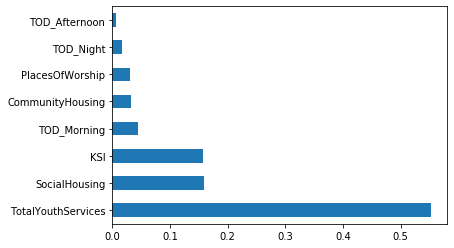

In [48]:
assault = rfr_model(X_train_2,\
                          np.ravel(y_train.iloc[:,[0]]),\
                         y_test.iloc[:,[0]])

Best Parameters {'max_depth': 6, 'n_estimators': 10}
Mean Absolute Error 27.27131228767014
Mean Squared Error 3339.664928394192
Feature Importance Coeff: (['KSI', 'TotalYouthServices', 'CommunityHousing', 'PlacesOfWorship', 'SocialHousing', 'TOD_Afternoon', 'TOD_Morning', 'TOD_Night'], array([0.19114255, 0.02144821, 0.11053861, 0.45627602, 0.05952761,
       0.0028819 , 0.01563081, 0.14255429]))


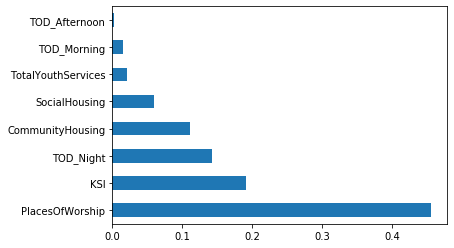

In [49]:
autoTheft = rfr_model(X_train_2,\
                          np.ravel(y_train.iloc[:,[1]]),\
                         y_test.iloc[:,[1]])

Best Parameters {'max_depth': 6, 'n_estimators': 75}
Mean Absolute Error 28.665138152028025
Mean Squared Error 1810.1997331297018
Feature Importance Coeff: (['KSI', 'TotalYouthServices', 'CommunityHousing', 'PlacesOfWorship', 'SocialHousing', 'TOD_Afternoon', 'TOD_Morning', 'TOD_Night'], array([0.28539687, 0.35926588, 0.02436136, 0.14641117, 0.10267358,
       0.01037129, 0.00901583, 0.06250402]))


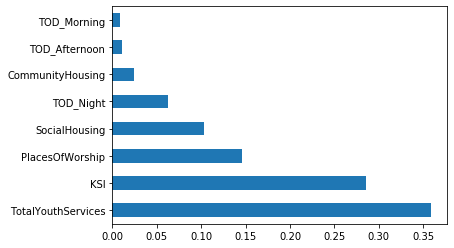

In [66]:
BreakEnter = rfr_model(X_train_2,\
                          np.ravel(y_train.iloc[:,[2]]),\
                         y_test.iloc[:,[2]])

Best Parameters {'max_depth': 5, 'n_estimators': 50}
Mean Absolute Error 22.16278213500032
Mean Squared Error 1219.6717729837126
Feature Importance Coeff: (['Population', 'KSI', 'TotalYouthServices', 'CommunityHousing', 'PlacesOfWorship', 'SocialHousing', 'TPSFacilities_2km_TF', 'TOD_Afternoon', 'TOD_Morning', 'TOD_Night'], array([0.21812523, 0.32577705, 0.04118907, 0.042459  , 0.13847513,
       0.01174662, 0.1471997 , 0.07502821]))


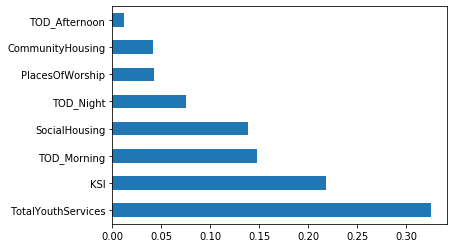

In [45]:
Robbery = rfr_model(X_train_2,\
                          np.ravel(y_train.iloc[:,[3]]),\
                         y_test.iloc[:,[3]])

Best Parameters {'max_depth': 6, 'n_estimators': 10}
Mean Absolute Error 6.751944278187233
Mean Squared Error 147.47768719066602
Feature Importance Coeff: (['Population', 'KSI', 'TotalYouthServices', 'CommunityHousing', 'PlacesOfWorship', 'SocialHousing', 'TPSFacilities_2km_TF', 'TOD_Afternoon', 'TOD_Morning', 'TOD_Night'], array([0.17591701, 0.61020944, 0.01673449, 0.13114203, 0.01631506,
       0.03129322, 0.01395527, 0.00443348]))


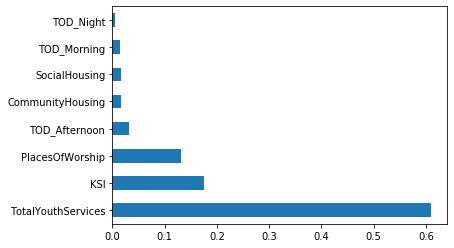

In [46]:
TheftOver = rfr_model(X_train_2,\
                          np.ravel(y_train.iloc[:,[4]]),\
                         y_test.iloc[:,[4]])

In [101]:
# import linear regression from sklearn
from sklearn.linear_model import LinearRegression

# import to assess performance based on mse and R^2
from sklearn.metrics import mean_squared_error, r2_score

from scipy import stats

from sklearn.feature_selection import chi2